> # **Nader Mohamed Elhadedy**

In [1]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

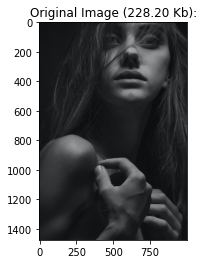

In [2]:
# load image
path = 'test_image.jpg'
img = Image.open(path)
org_size = float(os.path.getsize(path))/1000

plt.title("Original Image (%0.2f Kb):" %org_size)
plt.imshow(img)
plt.show()

In [3]:
# keep gray values
img_gray = img.convert('LA')
img_matrix = np.array(list(img_gray.getdata(band = 0)), float)
img_matrix.shape = (img_gray.size[1], img_gray.size[0])
img_matrix = np.matrix(img_matrix)

print(f"Matrix:\n{img_matrix}")

Matrix:
[[17. 17. 18. ... 17. 17. 16.]
 [15. 16. 17. ... 16. 15. 15.]
 [14. 15. 17. ... 16. 16. 16.]
 ...
 [24. 32. 30. ... 15. 13. 12.]
 [29. 28. 34. ... 13. 12. 17.]
 [29. 27. 34. ... 13. 12. 17.]]


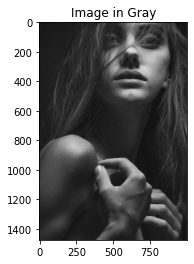

In [4]:
# draw image in grayscale
plt.figure()
plt.imshow(img_matrix, cmap = 'gray')
plt.title("Image in Gray")
plt.show()

In [5]:
# get matrix rank
rank = np.linalg.matrix_rank(img_matrix)
print(f"Rank: {rank}")

Rank: 1000


In [6]:
# computing SVD
U, S, Vt = np.linalg.svd(img_matrix)

print(len(S))
print(S)

1000
[5.44846832e+04 1.89648106e+04 1.48672684e+04 1.01671978e+04
 8.61643772e+03 7.10594525e+03 6.28720496e+03 5.33841795e+03
 4.32523249e+03 3.87239033e+03 3.27186751e+03 3.10434174e+03
 3.00492698e+03 2.67397738e+03 2.32927478e+03 2.23467031e+03
 1.98167396e+03 1.91994235e+03 1.83191604e+03 1.74783527e+03
 1.72656951e+03 1.60643361e+03 1.58287582e+03 1.49022832e+03
 1.44475276e+03 1.44164966e+03 1.35553130e+03 1.28417166e+03
 1.27645735e+03 1.19968174e+03 1.15668689e+03 1.08689566e+03
 1.07110678e+03 1.04864461e+03 9.96581702e+02 9.77537467e+02
 9.59479128e+02 9.51807505e+02 9.12245814e+02 9.08493984e+02
 9.03096700e+02 8.83802689e+02 8.55170490e+02 8.35031049e+02
 8.23084334e+02 8.17586587e+02 8.07131361e+02 7.87005680e+02
 7.73767655e+02 7.68456554e+02 7.59674419e+02 7.39317696e+02
 7.34975294e+02 7.33135568e+02 7.22073173e+02 7.09586123e+02
 6.99958676e+02 6.91873879e+02 6.89876264e+02 6.78371705e+02
 6.77287631e+02 6.64336092e+02 6.56158058e+02 6.51028817e+02
 6.47022416e+02 6.4

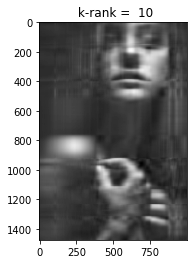

New_Size: 55.73 kb
Comp_Ratio: 24.42%
MSE: 106.25


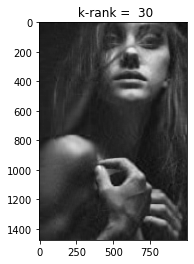

New_Size: 74.34 kb
Comp_Ratio: 32.58%
MSE: 50.63


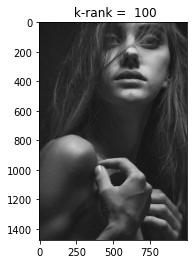

New_Size: 116.52 kb
Comp_Ratio: 51.06%
MSE: 26.4


In [7]:
# measure k-rank and display results

for i in [10,30,100]:
  comp_img = np.matrix(U[:, :i]) * np.diag(S[:i]) * np.matrix(Vt[:i,:])
  plt.imshow(comp_img, cmap = 'gray')
  title = " k-rank =  %s" %i
  plt.title(title)
  plt.show()
  result = Image.fromarray((comp_img ).astype(np.uint8))
  result.save('comp_img.jpg')
  new_size = round(float(os.path.getsize('comp_img.jpg'))/1000,2)
  mse = np.mean(np.square(np.subtract(img_matrix,comp_img)))
  print(f"New_Size: {new_size} kb\nComp_Ratio: {round(new_size/org_size*100,2)}%\nMSE: {round(mse,2)}")

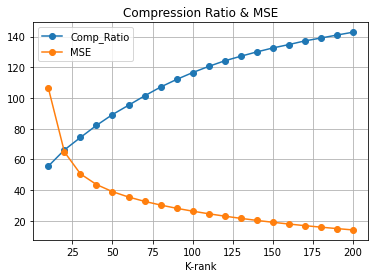

In [8]:
# plot Compression Ratios and MSEs for different k values

k_ranks = []
comp_ratios = []
mean_sq_errors = []

for i in range(10, 201, 10):
  k_ranks.append(i)
  comp_img = np.matrix(U[:, :i]) * np.diag(S[:i]) * np.matrix(Vt[:i,:])
  result = Image.fromarray((comp_img ).astype(np.uint8))
  result.save('comp_img.jpg')
  new_size = round(float(os.path.getsize('comp_img.jpg'))/1000,2)
  comp_ratios.append(new_size)
  mse = np.mean(np.square(np.subtract(img_matrix,comp_img)))
  mean_sq_errors.append(mse)

# when k increases, compression ratio increases
# and mean square error decreases
plt.plot(k_ranks, comp_ratios, '-o', label="Comp_Ratio")
plt.plot(k_ranks, mean_sq_errors, '-o', label="MSE")
plt.legend()
plt.grid()
plt.xlabel("K-rank")
plt.title("Compression Ratio & MSE")
plt.show()